In [1]:
#!pip install fbprophet

In [1]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [2]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [3]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [5]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 3: Covid-19 Pandemic (2020)

In [10]:
#historical_period = "2018-2020"
#prediction_period = "2020-2021"
index = "DJones"

query = '''
select * from DJones
'''

data = pd.read_sql(query, conn)
all_historic_DJ = data[['Date', 'Close']]
all_historic_DJ.head()

,Date,Close
0,2000-01-03,11358
1,2000-01-04,10998
2,2000-01-05,11123
3,2000-01-06,11253
4,2000-01-07,11523


In [12]:
#all_historic_DJ.to_sql(name = "all_historic_DJ", if_exists="append", con=conn, index=False)

NameError: name 'historical_period' is not defined

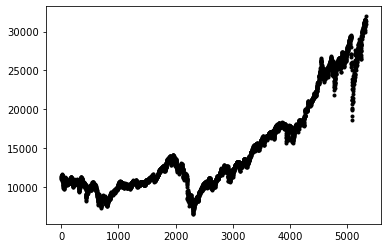

In [13]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

In [14]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
#data.tail()

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [15]:
all_predict_DJ = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper']]
all_predict_DJ.tail()

,ds,trend,yhat_lower,yhat_upper
5682,2022-02-22,31781.459889,30070.804442,33167.692270
5683,2022-02-23,31787.151242,30025.554390,33269.236458
5684,2022-02-24,31792.842595,30020.327027,33281.538153
5685,2022-02-25,31798.533948,29988.530392,33079.492533
5686,2022-02-26,31804.225301,30019.873765,33245.870667


In [17]:
#all_predict_DJ.to_sql(name = 'all_predict_DJ', if_exists='append', con=conn, index=False)

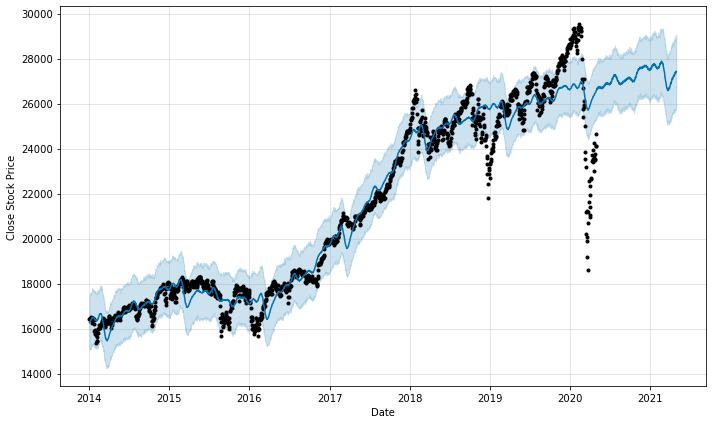

In [161]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')